In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
#from googletrans import Translator

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Viewing the data in the folder present from the drive
!ls "/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data"

EDA_customer_lifetime_value.ipynb  olist_orders_dataset.csv
EDA.ipynb			   olist_products_dataset.csv
olist_customers_dataset.csv	   olist_sellers_dataset.csv
olist_geolocation_dataset.csv	   product_category_name_translation.csv
olist_order_items_dataset.csv	   readme.md
olist_order_payments_dataset.csv   Untitled.ipynb
olist_order_reviews_dataset.csv


In [4]:
#identifying the datasets in local storage

dataset_files = glob.glob('/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/*.csv')
dataset_files

['/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_customers_dataset.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_geolocation_dataset.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_order_items_dataset.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_order_payments_dataset.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_products_dataset.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/product_category_name_translation.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_orders_dataset.csv',
 '/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/data/olist_order_reviews_dataset.csv

In [5]:
datasets_dict = {}

In [6]:
#loading the dataset files into pandas dataframes

for file in dataset_files:
    dataset_name = file.strip('/content/drive/My Drive/g04-brazillian-commerce-master/g04-brazillian-commerce-master/datadataset.csv')+'df'
    df = pd.read_csv(file)
    datasets_dict[dataset_name] = df

In [7]:
datasets_dict.keys()

dict_keys(['_customers_df', '_geolocation_df', '_order_items_df', '_order_payments_df', '_products_df', 'product_category_name_df', '_orders_df', '_order_reviews_df', '_sellers_df'])

In [8]:
customers_df = datasets_dict['_customers_df']
geolocation_df = datasets_dict['_geolocation_df']

orders_df = datasets_dict['_orders_df']
order_items_df = datasets_dict['_order_items_df']
order_payments_df = datasets_dict['_order_payments_df']
order_reviews_df = datasets_dict['_order_reviews_df']
products_df = datasets_dict['_products_df']
sellers_df = datasets_dict['_sellers_df']
product_category_name_translation_df = datasets_dict['product_category_name_df']

In [9]:
customers_order_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')
customers_order_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [10]:
for col in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    customers_order_df[col] = pd.to_datetime(customers_order_df[col])

In [11]:
customers_order_items_df = pd.merge(customers_order_df, order_items_df, on='order_id', how='left')
customers_order_items_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [12]:
customers_order_items_df = pd.merge(customers_order_items_df, products_df, on='product_id', how='left')
customers_order_items_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,relogios_presentes,59.0,452.0,1.0

In [13]:
customers_order_items_df = pd.merge(customers_order_items_df, product_category_name_translation_df, on='product_category_name', how='left')
customers_order_items_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0,health_beauty
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-1

In [14]:
customers_order_items_df = pd.merge(customers_order_items_df, sellers_df, on='seller_id', how='left')
customers_order_items_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest,17400.0,garca,SP
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure,14802.0,araraquara,SP
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18

In [15]:
customers_order_items_review_df = pd.merge(customers_order_items_df, order_reviews_df, on='order_id', how='left')
customers_order_items_review_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114095,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest,17400.0,garca,SP,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
114096,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c894

In [16]:
customers_order_items_review_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [17]:
olist_df = customers_order_items_review_df.drop(columns=['customer_city',
                                                         'customer_state',
                                                         'order_approved_at',
                                                         'order_delivered_carrier_date',
                                                         'shipping_limit_date',
                                                         'product_category_name',
                                                         'product_name_lenght',
                                                         'product_description_lenght',
                                                         'product_weight_g',
                                                         'product_length_cm',
                                                         'product_height_cm',
                                                         'product_width_cm',
                                                         'seller_city',
                                                         'seller_state',
                                                         'review_creation_date',
                                                         'review_answer_timestamp'])
olist_df

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,freight_value,product_photos_qty,product_category_name_english,seller_zip_code_prefix,review_id,review_score,review_comment_title,review_comment_message
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1.0,office_furniture,8577.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,3.0,housewares,88303.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1.0,office_furniture,8577.0,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1.0,office_furniture,8577.0,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1.0,home_confort,14940.0,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114095,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,2.0,books_general_interest,17400.0,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN
114096,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1.0,sports_leisure,14802.0,b273b431c3aedb4eed18643309652940,5,NaN,NaN
114097,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1.0,health_beauty,3304.0,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...
114098,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1.0,watches_gifts,14840.0,0bcdc9e450ea500811a8d39ee993cd47,5,NaN,NaN


In [18]:
olist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114100 entries, 0 to 114099
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    114100 non-null  object        
 1   customer_unique_id             114100 non-null  object        
 2   customer_zip_code_prefix       114100 non-null  int64         
 3   order_id                       114100 non-null  object        
 4   order_status                   114100 non-null  object        
 5   order_purchase_timestamp       114100 non-null  datetime64[ns]
 6   order_delivered_customer_date  110847 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114100 non-null  datetime64[ns]
 8   order_item_id                  113322 non-null  float64       
 9   product_id                     113322 non-null  object        
 10  seller_id                      113322 non-null  object        
 11  

In [19]:
time_series_df = olist_df.set_index('order_purchase_timestamp')
time_series_df

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,freight_value,product_photos_qty,product_category_name_english,seller_zip_code_prefix,review_id,review_score,review_comment_title,review_comment_message
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,
2017-05-16 15:05:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1.0,office_furniture,8577.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN
2018-01-12 20:48:24,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,3.0,housewares,88303.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN
2018-05-19 16:07:45,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1.0,office_furniture,8577.0,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN
2018-03-13 16:06:38,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1.0,office_furniture,8577.0,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN
2018-07-29 09:51:30,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1.0,home_confort,14940.0,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-07 15:48:17,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,2.0,books_general_interest,17400.0,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN
2018-04-04 08:20:22,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1.0,sports_leisure,14802.0,b273b431c3aedb4eed18643309652940,5,NaN,NaN
2018-04-08 20:11:50,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1.0,health_beauty,3304.0,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...


In [20]:
price_time_series_df = time_series_df[['price', 'freight_value']]
price_time_series_df = price_time_series_df.resample('D').sum()
price_time_series_df

,price,freight_value
order_purchase_timestamp,,
2016-09-04,72.89,63.34
2016-09-05,59.50,15.56
2016-09-06,0.00,0.00
2016-09-07,0.00,0.00
2016-09-08,0.00,0.00
...,...,...
2018-10-13,0.00,0.00
2018-10-14,0.00,0.00
2018-10-15,0.00,0.00


In [21]:
#checking for null values
price_time_series_df.isnull().values.any()

False

In [22]:
from scipy.stats import pearsonr
corr, _ = pearsonr(price_time_series_df.price, price_time_series_df.freight_value)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.981


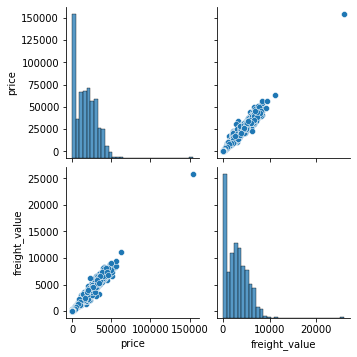

In [23]:
sns.pairplot(price_time_series_df)

In [24]:
price_time_series_df['total_cost'] = price_time_series_df.price + price_time_series_df.freight_value

In [25]:
print(price_time_series_df['price'].sum())    #should still be equal to the total value before resampling
print(price_time_series_df['freight_value'].sum())    #should still be equal to the total value before resampling
print(price_time_series_df['total_cost'].sum())    #should still be equal to the sum of price and freight value

13653185.050000018
2264132.88
15917317.930000015


In [26]:
price_moving_average = price_time_series_df['total_cost'].rolling(7).mean()

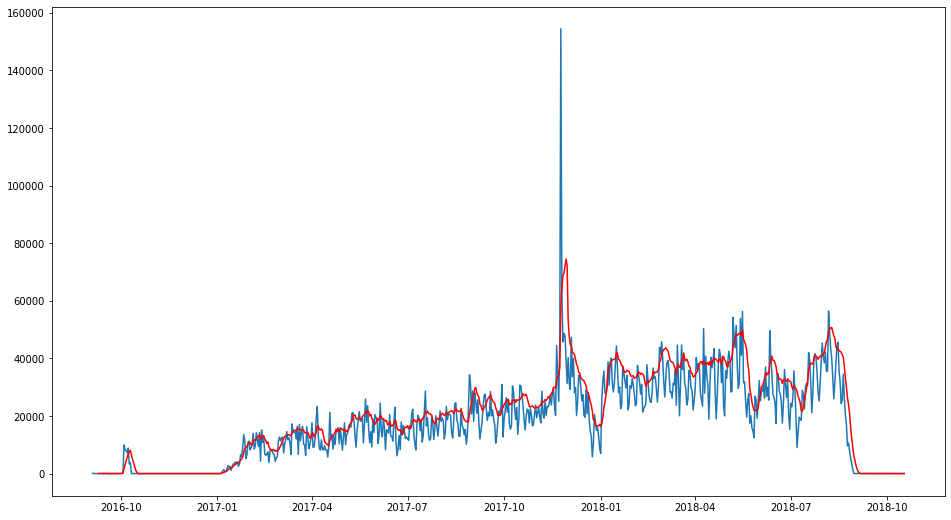

In [27]:
plt.figure(figsize=(16, 9))
plt.plot(price_time_series_df.index, price_time_series_df['price'])
plt.plot(price_moving_average, color='r');

In [28]:
price_time_series_df['price'].idxmax()

Timestamp('2017-11-24 00:00:00', freq='D')

In [29]:
#time_series_df = time_series_df.resample('D').sum()
d = price_time_series_df[price_time_series_df['price'] == 0]
d

,price,freight_value,total_cost
order_purchase_timestamp,,,
2016-09-06,0.0,0.0,0.0
2016-09-07,0.0,0.0,0.0
2016-09-08,0.0,0.0,0.0
2016-09-09,0.0,0.0,0.0
2016-09-10,0.0,0.0,0.0
...,...,...,...
2018-10-13,0.0,0.0,0.0
2018-10-14,0.0,0.0,0.0
2018-10-15,0.0,0.0,0.0


In [30]:
price_time_series_df.price.value_counts()

0.00        158
19564.85      1
35682.61      1
16148.41      1
396.90        1
           ... 
26376.57      1
11448.93      1
10025.60      1
28189.09      1
59.50         1
Name: price, Length: 617, dtype: int64

In [31]:
for day in d.index:
    price_time_series_df.drop(day, inplace = True, axis = 0)

In [32]:
price_time_series_df.price.value_counts()

19564.85    1
10651.18    1
19334.15    1
16148.41    1
396.90      1
           ..
47348.52    1
26376.57    1
11448.93    1
10025.60    1
59.50       1
Name: price, Length: 616, dtype: int64

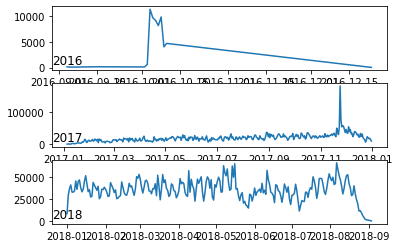

In [33]:
# plot active power for each year
years = ['2016', '2017', '2018']
plt.figure()
for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]

# get all observations for the year
    result = price_time_series_df[str(year)]
# plot the active power for the year
    plt.plot(result['total_cost'])
# add a title to the subplot
    plt.title(str(year), y=0, loc='left')
plt.show()

oveer the years the inflow of cash has been alot better
in 2016 it was really bad there was a little bit of spike in october
another thing to take note of is that since the 100000 spike in november 2017 there has been a better turn in of income wich is saying the black friday sales brought an uprise in income and shhould be encouraged

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


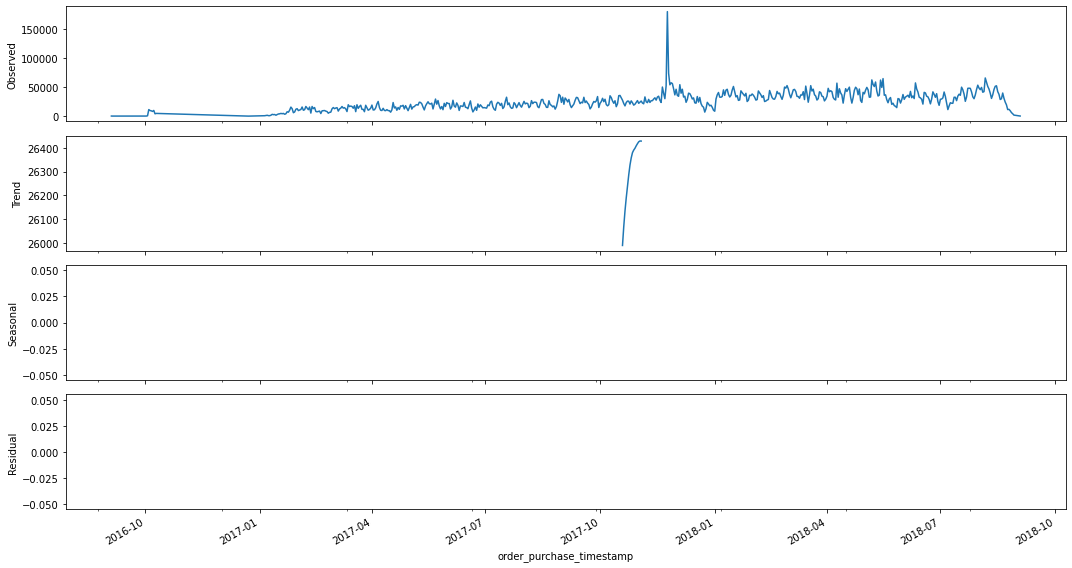

In [34]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(price_time_series_df['total_cost'], model = 'additive', freq= (10*6*10))
decompose_series.plot()
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(price_time_series_df['total_cost'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')


ADF Statistic: -3.1595230768749185
p-value: 0.02245048152100089
No. of lags used: 15
No. of observations used : 600
Critical Values:
   1%: -3.4412958288564814
   5%: -2.8663691131481484
   10%: -2.5693418027777777


In [36]:
price_time_series_dff = np.log(price_time_series_df)

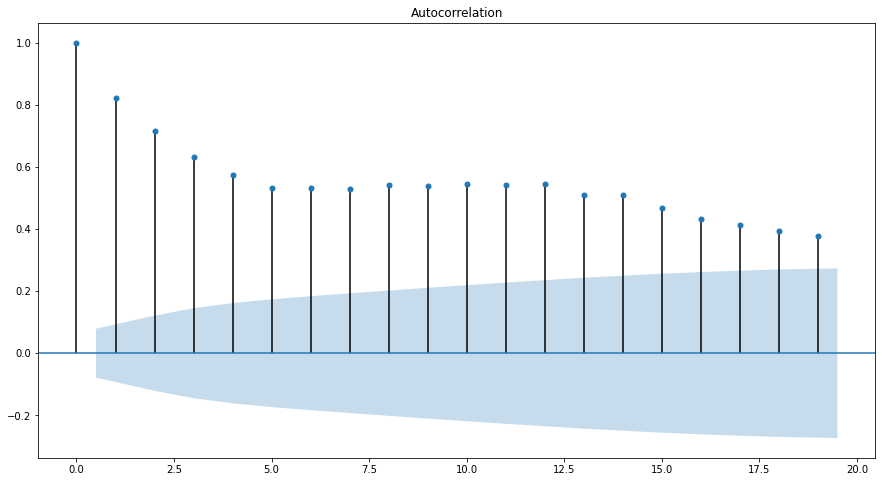

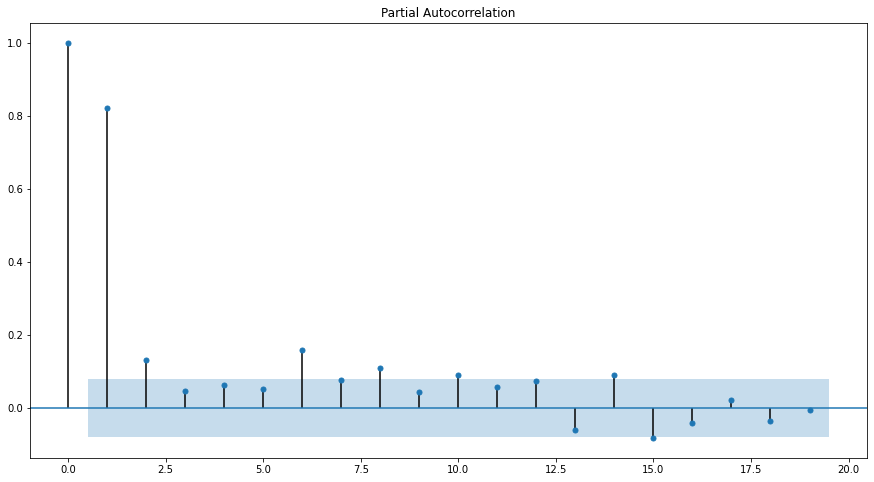

In [37]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#acf
plot_acf(price_time_series_dff.total_cost, lags = range(0, 20))
plt.show()
#pacf
plot_pacf(price_time_series_dff.total_cost, lags = range(0, 20))
plt.show()

In [38]:
price_time_series_df

,price,freight_value,total_cost
order_purchase_timestamp,,,
2016-09-04,72.89,63.34,136.23
2016-09-05,59.50,15.56,75.06
2016-09-15,134.97,8.49,143.46
2016-10-02,100.00,9.34,109.34
2016-10-03,463.48,131.66,595.14
...,...,...,...
2018-08-26,8070.71,1262.45,9333.16
2018-08-27,5345.91,765.70,6111.61
2018-08-28,3673.91,447.31,4121.22


In [39]:
train = price_time_series_dff[:500]
test = price_time_series_dff[500:]

In [40]:
test

,price,freight_value,total_cost
order_purchase_timestamp,,,
2018-05-07,10.900353,9.024025,11.042851
2018-05-08,10.775521,8.844283,10.910899
2018-05-09,10.684625,8.907680,10.840906
2018-05-10,10.848534,8.911020,10.983119
2018-05-11,10.541629,8.592453,10.674753
...,...,...,...
2018-08-26,8.995997,7.140810,9.141329
2018-08-27,8.584087,6.640790,8.717946
2018-08-28,8.209012,6.103252,8.323905


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


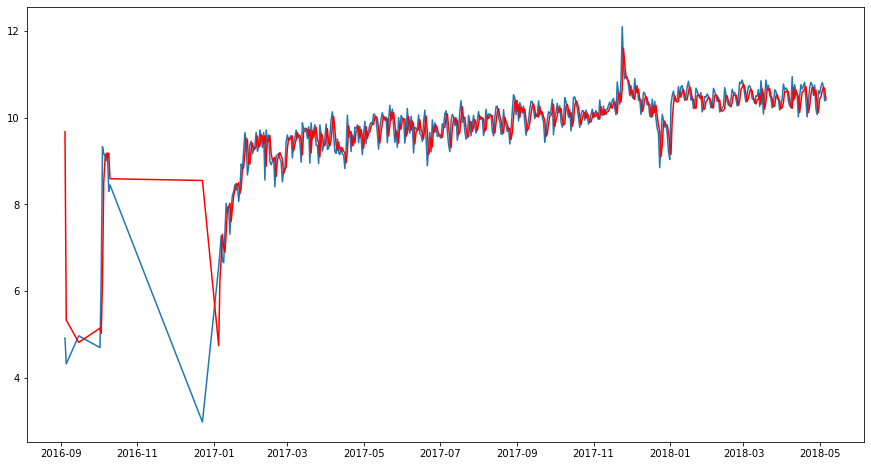

In [41]:
from statsmodels.tsa.arima_model import ARIMA
AR_model = ARIMA(train.total_cost, order = (3,0,0))
AR_model_results = AR_model.fit()
plt.plot(train.total_cost)
plt.plot(AR_model_results.fittedvalues, color= 'red')

In [42]:
from fbprophet import Prophet
data_daily2 = train.reset_index()
data_daily2 = data_daily2[['order_purchase_timestamp','total_cost']]
data_daily2.shape 


(500, 2)

In [43]:
new_df = data_daily2.rename(columns={"order_purchase_timestamp": "ds", "total_cost": "y"})
new_df.head()

,ds,y
0,2016-09-04,4.914345
1,2016-09-05,4.318288
2,2016-09-15,4.966056
3,2016-10-02,4.694462
4,2016-10-03,6.388797


In [44]:
data_daily3 = test.reset_index()
data_daily3 = data_daily3[['order_purchase_timestamp','total_cost']]
data_daily3.shape 

(116, 2)

In [45]:
new_df1 = data_daily3.rename(columns={"order_purchase_timestamp": "ds", "total_cost": "y"})
new_df1.head()

,ds,y
0,2018-05-07,11.042851
1,2018-05-08,10.910899
2,2018-05-09,10.840906
3,2018-05-10,10.983119
4,2018-05-11,10.674753


In [46]:
model = Prophet()
model.fit(new_df)
 #future = model.make_future_dataframe(periods=12, freq='D') 
forecast = model.predict(new_df1.drop('y', axis = 1)) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-05-07,10.738455,10.090307,11.382724,10.639584,10.639584,10.639584
1,2018-05-08,10.818769,10.187390,11.497714,10.641947,10.641947,10.641947
2,2018-05-09,10.790685,10.182842,11.450615,10.644311,10.644311,10.644311
3,2018-05-10,10.697383,10.110603,11.358367,10.646674,10.646674,10.646674
4,2018-05-11,10.611914,9.932466,11.285827,10.649037,10.649037,10.649037
...,...,...,...,...,...,...,...
111,2018-08-26,10.666788,10.024301,11.361869,10.901907,10.806442,11.012462
112,2018-08-27,11.003141,10.267174,11.646571,10.904270,10.807302,11.015735
113,2018-08-28,11.083455,10.448944,11.744581,10.906634,10.807950,11.018969
114,2018-08-29,11.055371,10.372125,11.707040,10.908997,10.808668,11.022203


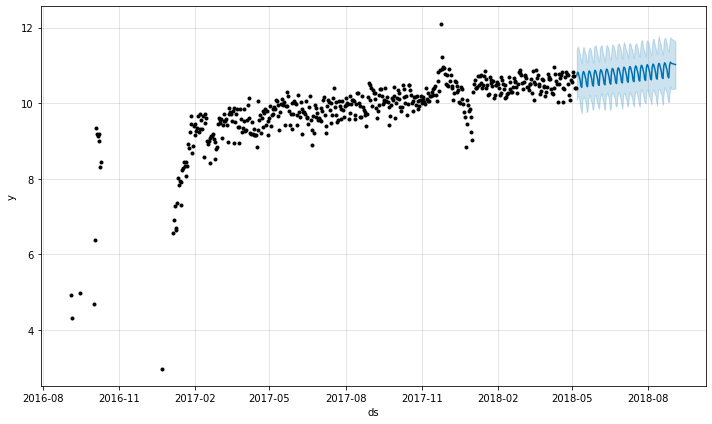

In [47]:
model.plot(forecast)
plt.show()       

In [48]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(new_df1.y, forecast.yhat)

5.6198132290105365

In [49]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(new_df1.y, forecast.yhat)

rmse = np.sqrt(mse)

print(rmse)

0.8727790137160746
